In [17]:
pip install Augmentor

In [1]:
%matplotlib inline

import Augmentor

import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

import joblib
from skimage.io import imread
from skimage.transform import resize

from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage

from tqdm import tqdm

### Mild demented

In [2]:
mild_dem = []
mild_hog = []
mild_hog_img = []
#mild_fin = []

In [3]:
for i in tqdm(range(1, 897)):
    mri = imread('Mild_Demented/mild_' + str(i) + '.jpg')#, as_gray=True)
    mild_dem.append(mri)
    mild_hog_i, mild_hog_img_i = hog(
    mri, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
    #mild_fin_i = StandardScaler(mild_hog_i)
    mild_hog.append(mild_hog_i)
    mild_hog_img.append(mild_hog_img_i)
    #mild_fin.append(mild_fin_i)

100%|██████████| 896/896 [00:15<00:00, 58.58it/s]


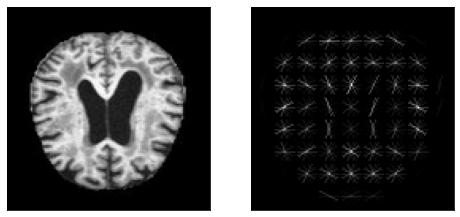

In [4]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(mild_dem[33], cmap='gray')
ax[1].imshow(mild_hog_img[33], cmap='gray')
plt.show()

### Non demented

In [5]:
non_dem = []
non_dem_hog = []
non_dem_hog_img = []
#non_dem_fin = []

In [6]:
for i in tqdm(range(1, 3201)):
    mri = imread('Non_Demented/non_' + str(i) + '.jpg')#, as_gray=True)
    non_dem.append(mri)
    non_dem_hog_i, non_dem_hog_img_i = hog(
    mri, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
    #non_dem_fin_i = StandardScaler()
    non_dem_hog.append(non_dem_hog_i)
    non_dem_hog_img.append(non_dem_hog_img_i)
    #non_dem_fin.append(non_dem_fin_i)

100%|██████████| 3200/3200 [00:53<00:00, 59.38it/s]


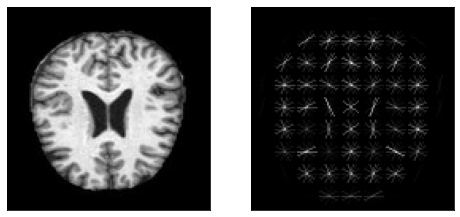

In [7]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(non_dem[33], cmap='gray')
ax[1].imshow(non_dem_hog_img[33], cmap='gray')
plt.show()

### Moderate demented

In [8]:
moderate_dem = []
mod_hog = []
mod_hog_img = []
#mod_fin = []

In [9]:
for i in tqdm(range(1, 65)):
    mri = imread('Moderate_Demented/moderate_' + str(i) + '.jpg')#, as_gray=True)
    moderate_dem.append(mri)
    mod_hog_i, mod_hog_img_i = hog(
    mri, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
    #mod_hog_fin_i = StandardScaler()
    mod_hog.append(mod_hog_i)
    mod_hog_img.append(mod_hog_img_i)
    #mod_fin.append(mod_hog_fin_i)

100%|██████████| 64/64 [00:01<00:00, 60.68it/s]


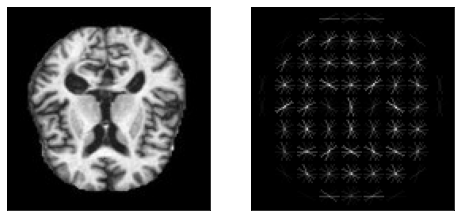

In [10]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(moderate_dem[33], cmap='gray')
ax[1].imshow(mod_hog_img[33], cmap='gray')
plt.show()

### Very mild demented

In [11]:
very_mild_dem = []
very_mild_hog = []
very_mild_hog_img = []
#very_mild_fin = []

In [12]:
for i in tqdm(range(1, 2241)):
    mri = imread('Very_Mild_Demented/verymild_' + str(i) + '.jpg')#, as_gray=True)
    very_mild_dem.append(mri)
    very_mild_hog_i, very_mild_hog_img_i = hog(
    mri, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
    #very_mild_fin_i = StandardScaler()
    very_mild_hog.append(very_mild_hog_i)
    very_mild_hog_img.append(very_mild_hog_img_i)
    #very_mild_fin.append(very_mild_fin_i)

100%|██████████| 2240/2240 [00:37<00:00, 60.12it/s]


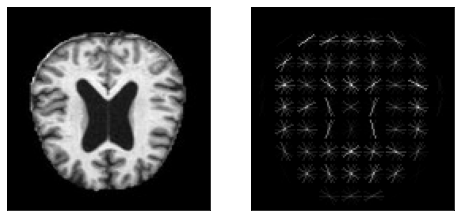

In [13]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]

ax[0].imshow(very_mild_dem[33], cmap='gray')
ax[1].imshow(very_mild_hog_img[33], cmap='gray')
plt.show()

## Dividiamo il cristo di dataset in madonna train e dio test

In [15]:
lista_finale = non_dem_hog + very_mild_hog + mild_hog + mod_hog
X = np.array(lista_finale)
X.shape

(6400, 2304)

In [16]:
non_dem_labels = np.repeat('Non demented', 3200)
very_mild_labels = np.repeat('Very mild', 2240)
mild_labels = np.repeat('Mild', 896)
moderate_labels = np.repeat('Moderate', 64)

In [17]:
labels = np.concatenate([non_dem_labels, very_mild_labels, mild_labels, moderate_labels])

In [18]:
X_train, X_test, labels_train, labels_test = train_test_split(
    X, 
    labels, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

In [19]:
print(len(X_train))
print(len(X_test))
print(len(labels_train))
print(len(labels_test))

5120
1280
5120
1280


#### Per aumentare il dataset

In [27]:
# NON RUNNARE

# Passing the path of the image directory
gabriele_coglione_1 = Augmentor.Pipeline("Very_Mild_Demented")
  
# Defining augmentation parameters and generating 5 samples
gabriele_coglione_1.flip_left_right(0.5)
gabriele_coglione_1.black_and_white(0.1)
gabriele_coglione_1.rotate(0.3, 10, 10)
gabriele_coglione_1.skew(0.4, 0.5)
gabriele_coglione_1.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
gabriele_coglione_1.sample(5000)

Initialised with 2240 image(s) found.
Output directory set to Very_Mild_Demented/output.

Processing <PIL.Image.Image image mode=L size=128x128 at 0x7FAA80678BE0>: 100%|██████████| 5000/5000 [00:13<00:00, 378.08 Samples/s]                  


## Transformers

#### Prepariamo il train set

In [20]:
scalify = StandardScaler()
X_train_prepared = scalify.fit_transform(X_train)

In [21]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, labels_train)

SGDClassifier(random_state=42)

#### Prepariamo il test set

In [23]:
X_test_prepared = scalify.fit_transform(X_test)

#### Predizione

In [26]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == labels_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == labels_test)/len(labels_test))

[ True  True False  True  True False  True  True False  True False  True
  True  True False False False  True False  True False  True  True False
 False]

Percentage correct:  59.921875
